# 인공신경망

**B3 유해정**\
유방암 결과를 분류하는 신경망 모델을 만들고 predict method를 이용하여 목표변수 범주를 예측하라. 그리고 모델의 정확도와 confusion matrix를 구하라.

In [1]:
execfile('setting.py')

In [2]:
# 데이터 구성:Series, DataFrame
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

# scaling
from sklearn.preprocessing import StandardScaler

# 데이터 분할:train, test
from sklearn.model_selection import train_test_split

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# 워닝 제거 및 폰트 정의

import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc("axes",unicode_minus=False)

# 그래프 (-) 기호 표시
matplotlib.rc("axes", unicode_minus = False)

In [4]:
# 분류 NN (MLPClassifier)
from sklearn.neural_network import MLPClassifier
# 분류 KNN
from sklearn.neighbors import KNeighborsClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report

## 데이터 구성하기

In [5]:
df_raw = pd.read_csv("221026_Big Data 분석_실습화일/2. Big Data 분석/유방암.csv", encoding = 'euc-kr')
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        음성        15.12         16.68           98.78      716.6   
1        양성        10.80          9.71           68.77      357.6   
2        음성        18.31         18.58          118.60     1041.0   
3        양성        14.92         14.93           96.45      686.9   
4        양성        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    object 
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

- 범주형 목표변수 diagnosis, 30개의 수치형 설명변수
- 결측치가 없어 결측치 처리 필요없음

In [7]:
df_raw.describe()

mean_radius  mean_texture  mean_perimeter    mean_area  \
count   320.000000    320.000000      320.000000   320.000000   
mean     15.709703     20.323250      103.050469   807.735937   
std       3.745788      4.150729       25.835984   391.969297   
min       7.691000      9.710000       47.920000   170.400000   
25%      13.050000     17.460000       84.845000   523.900000   
50%      15.125000     20.215000      100.100000   713.050000   
75%      18.520000     22.500000      121.550000  1075.250000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count       320.000000        320.000000      320.000000           320.000000   
mean          0.099358          0.123252        0.122144             0.066977   
std           0.014249          0.057207        0.084822             0.041732   
min           0.052630          0.026750        0.000000             0.000000   
25%           0.090240          0.081132        0.052770             0.029538   
50%           0.098570          0.115300        0.110850             0.065265   
75%           0.108050          0.155650        0.169550             0.091777   
max           0.163400          0.345400        0.426800             0.201200   

       mean_symmetry  mean_fractal_dimension  ...  worst_radius  \
count     320.000000              320.000000  ...    320.000000   
mean        0.186772                0.062679  ...     18.542406   
std         0.027485                0.007190  ...      5.182210   
min         0.127400                0.049960  ...      8.678000   
25%         0.166900                0.057450  ...     14.657500   
50%         0.184650                0.061445  ...     17.730000   
75%         0.202700                0.066705  ...     22.420000   
max         0.304000                0.097440  ...     36.040000   

       worst_texture  worst_perimeter   worst_area  worst_smoothness  \
count     320.000000       320.000000   320.000000        320.000000   
mean       27.225594       123.221625  1133.463438          0.137678   
std         6.050052        35.960154   640.979627          0.023316   
min        12.020000        54.490000   223.600000          0.085670   
25%        23.275000        95.525000   653.525000          0.122675   
50%        26.880000       118.850000   969.200000          0.138050   
75%        30.937500       148.850000  1538.500000          0.151200   
max        49.540000       251.200000  4254.000000          0.222600   

       worst_compactness  worst_concavity  worst_concave_points  \
count         320.000000       320.000000            320.000000   
mean            0.308713         0.352927              0.145487   
std             0.175225         0.214449              0.067292   
min             0.050360         0.000000              0.000000   
25%             0.180275         0.182950              0.090868   
50%             0.276950         0.339750              0.152700   
75%             0.405675         0.483675              0.197100   
max             1.058000         1.170000              0.291000   

       worst_symmetry  worst_fractal_dimension  
count      320.000000               320.000000  
mean         0.305097                 0.087156  
std          0.069367                 0.020076  
min          0.156500                 0.055040  
25%          0.258700                 0.073475  
50%          0.295800                 0.082640  
75%          0.328125                 0.097745  
max          0.663800                 0.207500  

[8 rows x 30 columns]

- 인공신경망은 거리기반이 아니지만 스케일링하면 가중치를 계산하는 등의 계산속도가 빨라진다고 하여 후에 정규화를 시행하려고 한다.
- 또 knn을 사용하려면 다양한 데이터의 범위를 스케일링 해주어야겠다.

In [8]:
# 목표변수 클래스 확인
print(df_raw.value_counts(["diagnosis"]),"\n")

diagnosis
음성           212
양성           108
dtype: int64 



- 음성(0) 클래스 212개, 양성(1) 클래스 108개 -> 목표변수 클래스 비율이 약 2:1 정도의 불균형 데이터, 하지만 데이터의 수가 컬럼수에 비해 너무 적다고 생각해 oversampling하지 않겠습니다.
- 또 인공신경망의 히든레이어와 가중치를 사용하는 방식으로 인해 oversampling할 경우 과대적합의 가능성이 있을 것이라고 생각하기 때문입니다.

## 데이터 전처리

범주형인 목표변수의 값을 0,1의 수치로 바꾸어줌

In [9]:
#목표변수를 0,1로 바꿈
df_raw.diagnosis.replace({'음성':0, '양성':1}, inplace=True)
df_raw.head()

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          0        15.12         16.68           98.78      716.6   
1          1        10.80          9.71           68.77      357.6   
2          0        18.31         18.58          118.60     1041.0   
3          1        14.92         14.93           96.45      686.9   
4          1        12.89         13.12           81.89      515.9   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   
3          0.08098           0.08549         0.05539              0.03221   
4          0.06955           0.03729         0.02260              0.01171   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   
3         0.1687  ...         17.18          18.22           112.00   
4         0.1337  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 31 columns]

In [10]:
#데이터 분리
df_raw_x = df_raw.drop("diagnosis",axis=1)
df_raw_y = df_raw["diagnosis"]
df_raw_y.head()

0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [11]:
df_raw_x.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        15.12         16.68           98.78      716.6          0.08876   
1        10.80          9.71           68.77      357.6          0.09594   
2        18.31         18.58          118.60     1041.0          0.08588   
3        14.92         14.93           96.45      686.9          0.08098   
4        12.89         13.12           81.89      515.9          0.06955   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0           0.09588         0.07550              0.04079         0.1594   
1           0.05736         0.02531              0.01698         0.1381   
2           0.08468         0.08169              0.05814         0.1621   
3           0.08549         0.05539              0.03221         0.1687   
4           0.03729         0.02260              0.01171         0.1337   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0                 0.05986  ...         17.77          20.24           117.70   
1                 0.06400  ...         11.60          12.02            73.66   
2                 0.05425  ...         21.31          26.36           139.20   
3                 0.05669  ...         17.18          18.22           112.00   
4                 0.05581  ...         13.62          15.54            87.40   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5           0.14910             0.3331           0.3327   
1       414.0           0.14360             0.1257           0.1047   
2      1410.0           0.12340             0.2445           0.3538   
3       906.6           0.10650             0.2791           0.3151   
4       577.0           0.09616             0.1147           0.1186   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  
3               0.11470          0.2688                  0.08273  
4               0.05366          0.2309                  0.06915  

[5 rows x 30 columns]

- 잘 분리된 것을 확인

In [12]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"] 

# 데이터 분할 train_test_split(X: 설명변수, Y: 목표변수, test_size = test 데이터 비율)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(
    df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 

print("분할 전 설명변수 데이터 :", df_raw_x.shape)
print("분할 후 설명변수 데이터 :Train", df_train_x.shape, "  Test",df_test_x.shape)

분할 전 설명변수 데이터 : (320, 30)
분할 후 설명변수 데이터 :Train (192, 30)   Test (128, 30)


## 모델 생성

### raw data 데이터 이용

In [13]:
nn_uncustomized = MLPClassifier(hidden_layer_sizes=(100,),random_state=1234)
# nn_uncustomized = MLPClassifier(random_state=1234, hidden_layer_sizes=(100,))
nn_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

MLPClassifier(random_state=1234)

Accuracy on training set: 0.599
Accuracy on test set: 0.758


- train set에 대한 정확도 59.9%, test set에 대한 정확도 75.8%로 과적합되진 않음

In [14]:
# 실행옵션 확인
print(nn_uncustomized.get_params().keys())
print(nn_uncustomized.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100,), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


In [15]:
nn_uncustomized2 = MLPClassifier(hidden_layer_sizes=(100,200), random_state=1234) # 은닉층 2개, 각 은닉층 노드 100개
nn_uncustomized2.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_uncustomized2.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_uncustomized2.score(df_test_x, df_test_y)))

MLPClassifier(hidden_layer_sizes=(100, 200), random_state=1234)

Accuracy on training set: 0.599
Accuracy on test set: 0.758


- 히든레이어를 1개 구성했을 때와 2개 구성했을 때의 정확도가 똑같다. -> 이 부분은 월요일에 교수님께 여쭤봐야지

In [16]:
# 실행옵션 확인
print(nn_uncustomized2.get_params().keys())
print(nn_uncustomized2.get_params().values())

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
dict_values(['relu', 0.0001, 'auto', 0.9, 0.999, False, 1e-08, (100, 200), 'constant', 0.001, 15000, 200, 0.9, 10, True, 0.5, 1234, True, 'adam', 0.0001, 0.1, False, False])


#### Hidden Layer : 은닉층 변경

In [17]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

print(para_hidden)

for v_hidden in para_hidden:
#     nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) # 은닉층 : 1D (5,), (10,)...
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234) # 은닉층 : 2D (5,5), (10,10)...
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1234)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=1234)

MLPClassifier(hidden_layer_sizes=(15, 15), random_state=1234)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1234)

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

MLPClassifier(hidden_layer_sizes=(30, 30), random_state=1234)

MLPClassifier(hidden_layer_sizes=(35, 35), random_state=1234)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1234)

MLPClassifier(hidden_layer_sizes=(45, 45), random_state=1234)

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(55, 55), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(65, 65), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(75, 75), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(85, 85), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(95, 95), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [18]:
# 은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.599         0.758
1            10          0.594         0.750
2            15          0.401         0.242
3            20          0.901         0.875
4            25          0.870         0.898
5            30          0.599         0.758
6            35          0.932         0.914
7            40          0.599         0.758
8            45          0.938         0.938
9            50          0.932         0.906
10           55          0.599         0.758
11           60          0.943         0.875
12           65          0.927         0.961
13           70          0.938         0.938
14           75          0.927         0.883
15           80          0.599         0.758
16           85          0.932         0.906
17           90          0.927         0.922
18           95          0.885         0.844
19          100          0.875         0.859

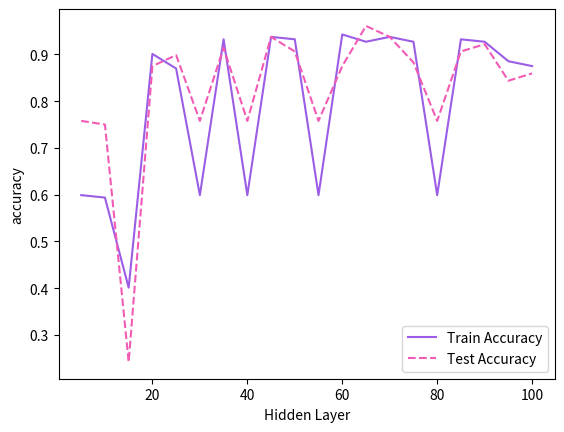

In [19]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend();

- 히든레이어의 개수에 상관없이 train과 test에 대한 성능이 비슷하게 가는 것을 볼 수 있음

#### Activation : 활성화 함수 변경

In [20]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

MLPClassifier(activation='logistic', random_state=1234)

MLPClassifier(activation='tanh', random_state=1234)

MLPClassifier(random_state=1234)

In [21]:
para_function

['logistic', 'tanh', 'relu']

In [22]:
# Activation Function별 정확도 테이블
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.943         0.898
1               tanh          0.943         0.906
2               relu          0.599         0.758

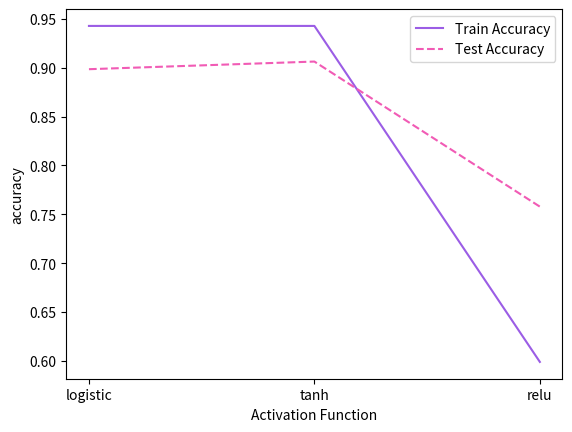

In [23]:
# 정확도 그래프 표현
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend();

- scale 미적용 데이터 기준으로 "relu"함수 적용시 정확도가 매우 낮음

### scale 변환

In [24]:
# 변수명 저장
v_feature_names = df_train_x.columns
# StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)
df_scaled.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0    -0.157678     -0.879112       -0.165550  -0.232872        -0.744948   
1    -1.312779     -2.560965       -1.328928  -1.150194        -0.240274   
2     0.695279     -0.420644        0.602798   0.596040        -0.947380   
3    -0.211154     -1.301385       -0.255876  -0.308762        -1.291796   
4    -0.753945     -1.738136       -0.820314  -0.745704        -2.095198   

   mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  \
0         -0.479220       -0.550769            -0.628488      -0.997431   
1         -1.153621       -1.143404            -1.199934      -1.773612   
2         -0.675307       -0.477679            -0.212084      -0.899042   
3         -0.661126       -0.788224            -0.834410      -0.658535   
4         -1.505004       -1.175403            -1.326415      -1.933950   

   mean_fractal_dimension  ...  worst_radius  worst_texture  worst_perimeter  \
0               -0.392627  ...     -0.149283      -1.156442        -0.153789   
1                0.184077  ...     -1.341759      -2.517236        -1.380396   
2               -1.174101  ...      0.534893      -0.143296         0.445031   
3               -0.834209  ...     -0.263312      -1.490846        -0.312546   
4               -0.956793  ...     -0.951354      -1.934512        -0.997708   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0   -0.224951          0.490637           0.139396        -0.094470   
1   -1.124201          0.254373          -1.046076        -1.159323   
2    0.432104         -0.613360          -0.367031         0.004076   
3   -0.354487         -1.339335          -0.169261        -0.176669   
4   -0.869505         -1.783511          -1.108951        -1.094404   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0             -0.301949        0.525611                 0.511081  
1             -1.480312       -1.387506                -0.507149  
2              0.172850        0.223844                -0.886803  
3             -0.458230       -0.524077                -0.220788  
4             -1.366747       -1.071301                -0.898278  

[5 rows x 30 columns]

- Standardscaler를 사용하여 평균이 0, 분산이 1인 정규분포 형태의 데이터로 스케일링된 것을 확인

In [25]:
# 데이터 분할
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.4,random_state = 1234)
print("train data X size : {}".format(df_scaled_train_x.shape))
print("test data X size : {}".format(df_scaled_test_x.shape))

train data X size : (192, 30)
test data X size : (128, 30)


In [26]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(nn_scaled.score(df_scaled_test_x, df_test_y)))

MLPClassifier(random_state=1234)

Accuracy on training set: 0.995
Accuracy on test set: 0.953


- train set에 대한 정확도 99.5%, test set에 대한 정확도 95.3%
- 과대적합되어 규제가 필요할 것 같다.

#### Hidden Layer : 은닉층 변경

In [27]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
para_hidden = [5 * hidden for hidden in range(1, 21)]  # 은닉층 노드 : 5~100

print(para_hidden)

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden,v_hidden), random_state = 1234)  
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["TestAccuracy"] = test_accuracy

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


MLPClassifier(hidden_layer_sizes=(5, 5), random_state=1234)

MLPClassifier(hidden_layer_sizes=(10, 10), random_state=1234)

MLPClassifier(hidden_layer_sizes=(15, 15), random_state=1234)

MLPClassifier(hidden_layer_sizes=(20, 20), random_state=1234)

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

MLPClassifier(hidden_layer_sizes=(30, 30), random_state=1234)

MLPClassifier(hidden_layer_sizes=(35, 35), random_state=1234)

MLPClassifier(hidden_layer_sizes=(40, 40), random_state=1234)

MLPClassifier(hidden_layer_sizes=(45, 45), random_state=1234)

MLPClassifier(hidden_layer_sizes=(50, 50), random_state=1234)

MLPClassifier(hidden_layer_sizes=(55, 55), random_state=1234)

MLPClassifier(hidden_layer_sizes=(60, 60), random_state=1234)

MLPClassifier(hidden_layer_sizes=(65, 65), random_state=1234)

MLPClassifier(hidden_layer_sizes=(70, 70), random_state=1234)

MLPClassifier(hidden_layer_sizes=(75, 75), random_state=1234)

MLPClassifier(hidden_layer_sizes=(80, 80), random_state=1234)

MLPClassifier(hidden_layer_sizes=(85, 85), random_state=1234)

MLPClassifier(hidden_layer_sizes=(90, 90), random_state=1234)

MLPClassifier(hidden_layer_sizes=(95, 95), random_state=1234)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=1234)

In [28]:
# 은닉층별 정확도 테이블 
df_accuracy_hidden.round(3)

HiddenLayer  TrainAccuracy  TestAccuracy
0             5          0.953         0.891
1            10          0.984         0.938
2            15          0.984         0.922
3            20          0.984         0.945
4            25          0.995         0.961
5            30          1.000         0.953
6            35          0.995         0.945
7            40          1.000         0.938
8            45          1.000         0.953
9            50          1.000         0.945
10           55          1.000         0.961
11           60          1.000         0.953
12           65          1.000         0.938
13           70          1.000         0.945
14           75          1.000         0.953
15           80          1.000         0.945
16           85          1.000         0.953
17           90          1.000         0.945
18           95          1.000         0.945
19          100          1.000         0.945

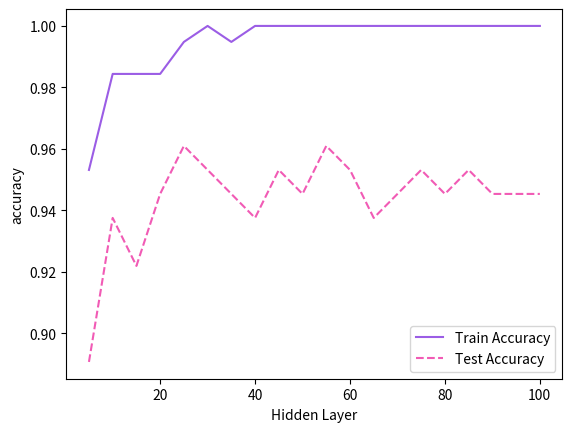

In [29]:
# 정확도 그래프 표현
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend();

- 은닉층 구조가 복잡할수록 모델의 정확도가 증가하다가 \
  train 모델은 40 이후로 과적합 경향이 보이고 test 모델은 95 부근에서 정확도 변동이 보임
- 과적합 경향을 고려하여 성능의 차이가 적은 25 선택

In [30]:
# 은닉층 지정(임의)
hidden_layer_sizes = 25

#### Activation : 활성화 함수 변경

In [31]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# activation 변경 
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (25, 25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["TestAccuracy"] = test_accuracy

MLPClassifier(activation='logistic', hidden_layer_sizes=(25, 25),
              random_state=1234)

MLPClassifier(activation='tanh', hidden_layer_sizes=(25, 25), random_state=1234)

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

In [32]:
# Activation Function별 정확도 테이블 
df_accuracy_function.round(3)

ActivationFunction  TrainAccuracy  TestAccuracy
0           logistic          0.990         0.945
1               tanh          0.995         0.945
2               relu          0.995         0.961

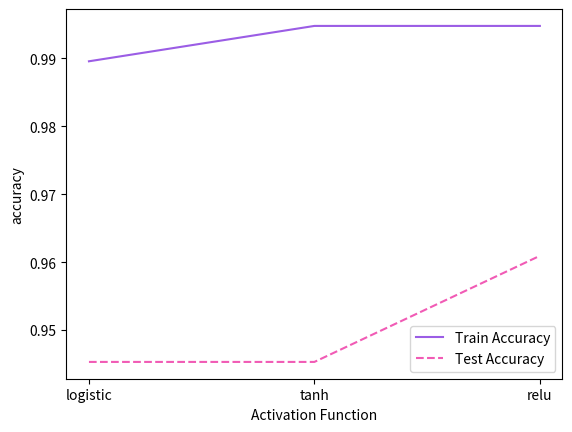

In [33]:
# Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend();

- scale 적용 데이터의 경우 "relu" 함수를 사용한 모델의 정확도가 가장 높음

In [34]:
# Activation Function 지정(임의)
activation = "relu"

#### Solver : 가중치 최적화 변경

In [35]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# solver 변경 
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn = MLPClassifier(solver = v_solver, activation="relu", hidden_layer_sizes=(25, 25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["TestAccuracy"] = test_accuracy

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234, solver='lbfgs')

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234, solver='sgd')

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234)

In [36]:
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

Solver  TrainAccuracy  TestAccuracy
0  lbfgs          1.000         0.969
1    sgd          0.953         0.883
2   adam          0.995         0.961

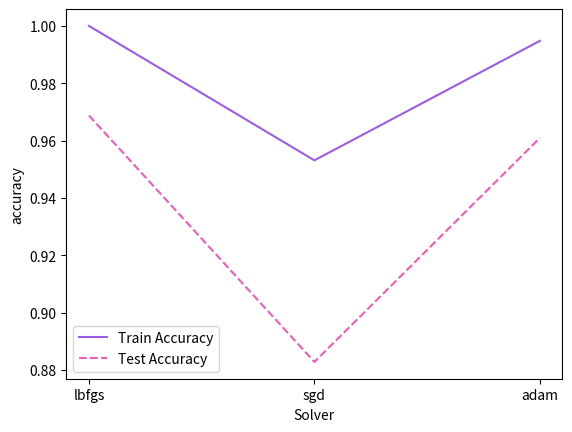

In [37]:
# 정확도 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend();

- lbfgs가 모델 설명력과 test 정확도가 높아서 선택

In [38]:
# Solver 지정
solver = "lbfgs" 

#### Mini Batch 변경

In [39]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# Mini Batch 변경. 20~180
para_batch = [20 * batch for batch in range(1, 10)] 

print(para_batch)

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "lbfgs", activation = "relu", 
                       hidden_layer_sizes = (25,25), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["TestAccuracy"] = test_accuracy

[20, 40, 60, 80, 100, 120, 140, 160, 180]


MLPClassifier(batch_size=20, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=40, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=60, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=80, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=100, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=120, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=140, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=160, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

MLPClassifier(batch_size=180, hidden_layer_sizes=(25, 25), random_state=1234,
              solver='lbfgs')

In [40]:
# Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

Mini Batch  TrainAccuracy  TestAccuracy
0          20            1.0         0.969
1          40            1.0         0.969
2          60            1.0         0.969
3          80            1.0         0.969
4         100            1.0         0.969
5         120            1.0         0.969
6         140            1.0         0.969
7         160            1.0         0.969
8         180            1.0         0.969

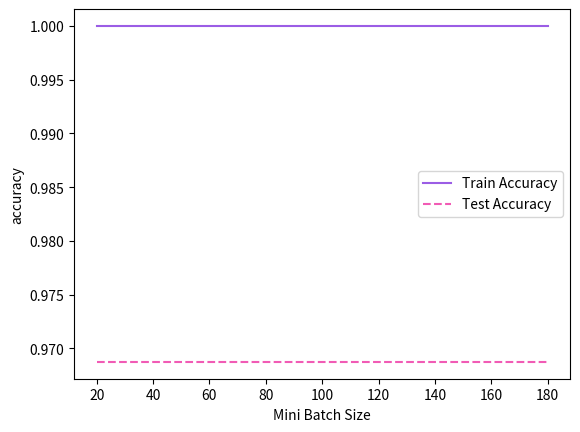

In [41]:
# 정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend();

- train 모델은 과적합 경향, test 모델은 미니 배치 크기에 다른 경향성이 없어 지정하지 않음

### 결론 도출

In [42]:
# 최종 모델
nn_final = MLPClassifier( solver = "lbfgs", activation = "relu", 
                       hidden_layer_sizes = (25,25), random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

# 평가
y_pred = nn_final.predict(df_scaled_test_x)

# train 데이터 셋 정확도
print("Accucary on training set: {:.3f}".format(nn_final.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}\n".format(nn_final.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

MLPClassifier(hidden_layer_sizes=(25, 25), random_state=1234, solver='lbfgs')

Accucary on training set: 1.000
Accuracy on test set: 0.969

Confusion matrix: 
[[94  3]
 [ 1 30]]
              precision    recall  f1-score   support

           0      0.989     0.969     0.979        97
           1      0.909     0.968     0.937        31

    accuracy                          0.969       128
   macro avg      0.949     0.968     0.958       128
weighted avg      0.970     0.969     0.969       128



- test set에 대한 정확도 96.8%
- 1 기준 f1-score는 93.7%
- 1기준 recall이 96.8%로 어제 만들었던 SVM 모델보다 높고 0기준 precision이 98.9%로 아주 높은 편이다.
 > 1 기준 recall이라는 것은 실제 암환자 중 암환자로 잘 예측한 비율을 말하고, 1기준 precision은 암이라고 예측한 환자중 실제 암환자의 비율입니다.
   precision이 낮다고 하면 암이라고 예측했는데 환자가 아닐 가능성이 커지는 것인데, 그 경우는 차라리 다행인 편이라고 생각합니다.
   
 > 반면 recall이 낮으면 실제 암환자를 암환자로 예측을 잘 못 한다는 것이므로 이 경우 recall이 높은 모델을 사용해야 한다고 생각합니다.
 > 또 0 기준 precision이 높은데, 그것은 실제 암환자가 아닌 사람을 잘 판단한다는 것이기 때문에 암환자를 찾지 못하는 일이 적어지므로 암환자를 찾는 보조도구로 사용하기 좋은 모델이라고 생각합니다.

# KNN

유방암 데이터를 이용하여 k(이웃 수)가 3~30까지 변화할 때까지 정확도(accuracy)의 변화를 그림으로 나타내고 predict method를 이용하여 예측값을 구해라. 그리고 실제값과의 정확도와 confusion matrix를 구해라.

## 모델 생성

### raw data 데이터 이용

In [43]:
# KNN 모델 생성(default 설정)
knn_uncusotomized = KNeighborsClassifier()
knn_uncusotomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(knn_uncusotomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(knn_uncusotomized.score(df_test_x, df_test_y)))

KNeighborsClassifier()

Accuracy on training set: 0.932
Accuracy on test set: 0.914


In [44]:
# 실행옵션 확인
print(knn_uncusotomized.get_params().keys())
print(knn_uncusotomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


- 디폴트 파라미터- algorithm:auto, metric:minkowski, n_neighbors:5, weights:uniform

#### 이웃 수 증가에 따른 정확도 변화

In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 21)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

In [46]:
df_accuracy_neighbors.round(3)

Neighbors  TrainAccuracy  TestAccuracy
0           1          1.000         0.898
1           2          0.938         0.914
2           3          0.932         0.898
3           4          0.911         0.891
4           5          0.932         0.914
5           6          0.927         0.914
6           7          0.927         0.898
7           8          0.922         0.914
8           9          0.911         0.906
9          10          0.911         0.906
10         11          0.917         0.906
11         12          0.917         0.906
12         13          0.911         0.914
13         14          0.917         0.906
14         15          0.917         0.906
15         16          0.911         0.906
16         17          0.901         0.906
17         18          0.906         0.898
18         19          0.896         0.906
19         20          0.891         0.906

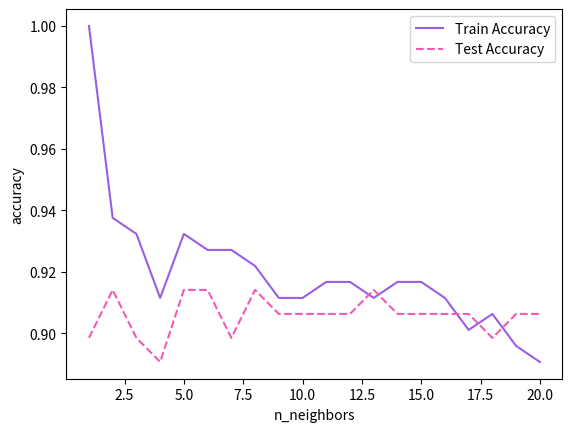

In [47]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend();

- 이웃(k) = 1일 때 모델의 정확도는 1로 과적합
- 이웃이 2 이상이면 train 모델의 정확도는 계속 감소하는 추세를 보임, test 모델의 정확도는 0.91부근에서 변동-> 최종 모델에 반영

In [48]:
# train과 test의 격차가 작은 5로 지정 n_neighbors =5

#### 가중치별 이웃 수 증가에 따른 정확도 변화

In [49]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, weights='distance')

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9, weights='distance')

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [50]:
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

Neighbors   Weights  TrainAccuracy  TestAccuracy
0           1   uniform          1.000         0.898
1           2   uniform          0.938         0.914
2           3   uniform          0.932         0.898
3           4   uniform          0.911         0.891
4           5   uniform          0.932         0.914
5           6   uniform          0.927         0.914
6           7   uniform          0.927         0.898
7           8   uniform          0.922         0.914
8           9   uniform          0.911         0.906
9          10   uniform          0.911         0.906
10          1  distance          1.000         0.898
11          2  distance          1.000         0.898
12          3  distance          1.000         0.898
13          4  distance          1.000         0.898
14          5  distance          1.000         0.914
15          6  distance          1.000         0.930
16          7  distance          1.000         0.891
17          8  distance          1.000         0.906
18          9  distance          1.000         0.914
19         10  distance          1.000         0.930

In [51]:
# 결과 확인을 위한 데이터 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors", columns = "Weights",
                                                      values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.898438  0.898438
2                   1.0  0.937500     0.898438  0.914062
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250

In [52]:
# pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head(10)

TrainAccuracy_distance  TrainAccuracy_uniform  \
Neighbors                                                  
1                             1.0               1.000000   
2                             1.0               0.937500   
3                             1.0               0.932292   
4                             1.0               0.911458   
5                             1.0               0.932292   
6                             1.0               0.927083   
7                             1.0               0.927083   
8                             1.0               0.921875   
9                             1.0               0.911458   
10                            1.0               0.911458   

           TestAccuracy_distance  TestAccuracy_uniform  
Neighbors                                               
1                       0.898438              0.898438  
2                       0.898438              0.914062  
3                       0.898438              0.898438  
4                       0.898438              0.890625  
5                       0.914062              0.914062  
6                       0.929688              0.914062  
7                       0.890625              0.898438  
8                       0.906250              0.914062  
9                       0.914062              0.906250  
10                      0.929688              0.906250

<AxesSubplot:xlabel='Neighbors'>

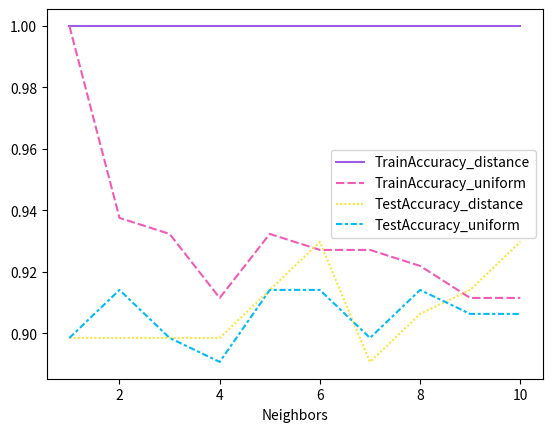

In [53]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

- 가중치 distance일 때 train모델의 정확도는 1(과대적합), uniform 선택

#### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [54]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 거리 계산 방법 (euclidean, manhattan)
para_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

KNeighborsClassifier(metric='manhattan')

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [55]:
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

Neighbors     Metric  TrainAccuracy  TestAccuracy
0           1  euclidean          1.000         0.898
1           2  euclidean          0.938         0.914
2           3  euclidean          0.932         0.898
3           4  euclidean          0.911         0.891
4           5  euclidean          0.932         0.914
5           6  euclidean          0.927         0.914
6           7  euclidean          0.927         0.898
7           8  euclidean          0.922         0.914
8           9  euclidean          0.911         0.906
9          10  euclidean          0.911         0.906
10          1  manhattan          1.000         0.906
11          2  manhattan          0.953         0.930
12          3  manhattan          0.932         0.898
13          4  manhattan          0.922         0.914
14          5  manhattan          0.943         0.938
15          6  manhattan          0.927         0.922
16          7  manhattan          0.917         0.922
17          8  manhattan          0.927         0.914
18          9  manhattan          0.917         0.914
19         10  manhattan          0.911         0.930

<AxesSubplot:xlabel='Neighbors'>

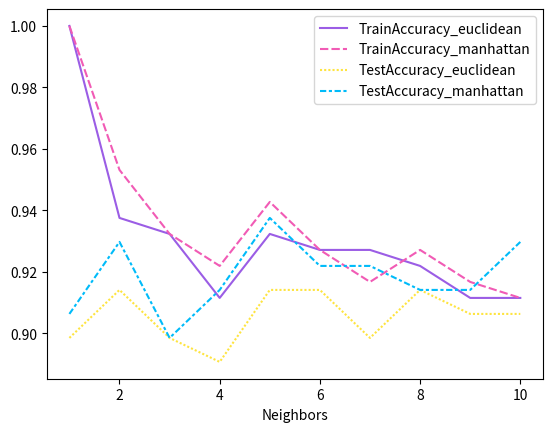

In [56]:
# 결과 확인을 위한 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

- 거리 계산 방법별 정확도는 큰 차이 없어보이나 test에 대한 정확도가 manhattan방법이 좀더 높아보임

#### 결론 도출

In [57]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 5, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)
# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

KNeighborsClassifier(metric='manhattan')

train data accuracy: 0.943
test data accuracy: 0.938

Confusion matrix: 
[[90  7]
 [ 1 30]]
              precision    recall  f1-score   support

           0      0.989     0.928     0.957        97
           1      0.811     0.968     0.882        31

    accuracy                          0.938       128
   macro avg      0.900     0.948     0.920       128
weighted avg      0.946     0.938     0.939       128



- test에 대한 성능 93.8%
- 1 기준 f1-score는 88.2%

knn은 거리기반이기 때문에 스케일이 중요하므로 스케일된 데이터로 다시 돌려보겠습니다.

### scale 변환

#### 이웃 수 증가에 따른 정확도 변화

In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1, 21)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(knn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(knn.score(df_scaled_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=12)

KNeighborsClassifier(n_neighbors=13)

KNeighborsClassifier(n_neighbors=14)

KNeighborsClassifier(n_neighbors=15)

KNeighborsClassifier(n_neighbors=16)

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=18)

KNeighborsClassifier(n_neighbors=19)

KNeighborsClassifier(n_neighbors=20)

In [59]:
df_accuracy_neighbors.round(3)

Neighbors  TrainAccuracy  TestAccuracy
0           1          1.000         0.953
1           2          0.979         0.961
2           3          0.969         0.914
3           4          0.979         0.938
4           5          0.958         0.922
5           6          0.974         0.930
6           7          0.964         0.906
7           8          0.958         0.914
8           9          0.964         0.930
9          10          0.964         0.922
10         11          0.964         0.914
11         12          0.974         0.922
12         13          0.974         0.898
13         14          0.969         0.914
14         15          0.969         0.914
15         16          0.969         0.906
16         17          0.958         0.906
17         18          0.969         0.898
18         19          0.964         0.898
19         20          0.964         0.906

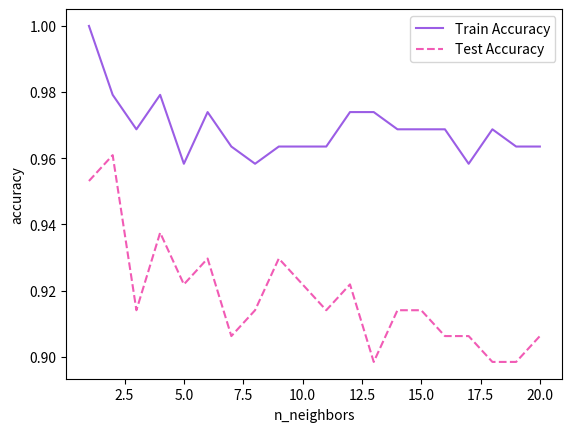

In [60]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend();

- 이웃(k) = 1일 때 모델의 정확도는 1로 과적합
- 이웃이 2 이상이면 train 모델의 정확도는 계속 감소하다가 0.97부근에서 변동을 보임, test 모델의 정확도는 감소하는 경향을 보임-> 최종 모델에 반영

In [61]:
# train과 test의 격차가 작고 test 성능이 좋은 2로 지정 n_neighbors =2

#### 가중치별 이웃 수 증가에 따른 정확도 변화

In [62]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10)
for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))    

KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

KNeighborsClassifier(n_neighbors=10)

KNeighborsClassifier(n_neighbors=1, weights='distance')

KNeighborsClassifier(n_neighbors=2, weights='distance')

KNeighborsClassifier(n_neighbors=3, weights='distance')

KNeighborsClassifier(n_neighbors=4, weights='distance')

KNeighborsClassifier(weights='distance')

KNeighborsClassifier(n_neighbors=6, weights='distance')

KNeighborsClassifier(n_neighbors=7, weights='distance')

KNeighborsClassifier(n_neighbors=8, weights='distance')

KNeighborsClassifier(n_neighbors=9, weights='distance')

KNeighborsClassifier(n_neighbors=10, weights='distance')

In [63]:
# 데이터 테이블로 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

Neighbors   Weights  TrainAccuracy  TestAccuracy
0           1   uniform          1.000         0.898
1           2   uniform          0.938         0.914
2           3   uniform          0.932         0.898
3           4   uniform          0.911         0.891
4           5   uniform          0.932         0.914
5           6   uniform          0.927         0.914
6           7   uniform          0.927         0.898
7           8   uniform          0.922         0.914
8           9   uniform          0.911         0.906
9          10   uniform          0.911         0.906
10          1  distance          1.000         0.898
11          2  distance          1.000         0.898
12          3  distance          1.000         0.898
13          4  distance          1.000         0.898
14          5  distance          1.000         0.914
15          6  distance          1.000         0.930
16          7  distance          1.000         0.891
17          8  distance          1.000         0.906
18          9  distance          1.000         0.914
19         10  distance          1.000         0.930

<AxesSubplot:xlabel='Neighbors'>

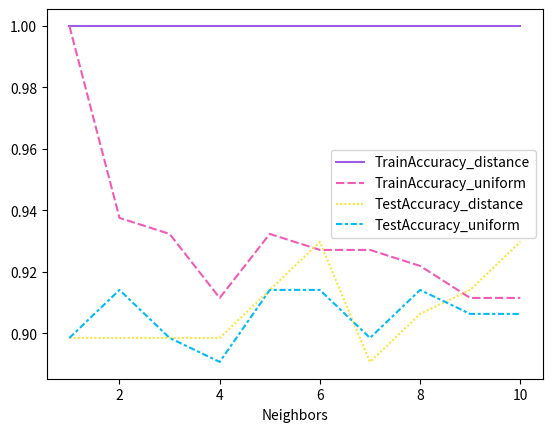

In [64]:
# 그래프 생성. 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

- 가중치 distance일 때 train모델의 정확도는 1(과대적합), uniform 선택

#### 거리 계산 방법별 이웃 수 증가에 따른 정확도 변화

In [65]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []
# 이웃 수
para_n_neighbors = [i for i in range(1,11)] * 2
# 거리 계산 방법 (euclidean, manhattan)
para_metric = ["euclidean"] * 10 + ["manhattan"] * 10

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors, metric = v_metric, weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))   

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

KNeighborsClassifier(metric='manhattan', n_neighbors=4)

KNeighborsClassifier(metric='manhattan')

KNeighborsClassifier(metric='manhattan', n_neighbors=6)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [66]:
# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

Neighbors     Metric  TrainAccuracy  TestAccuracy
0           1  euclidean          1.000         0.898
1           2  euclidean          0.938         0.914
2           3  euclidean          0.932         0.898
3           4  euclidean          0.911         0.891
4           5  euclidean          0.932         0.914
5           6  euclidean          0.927         0.914
6           7  euclidean          0.927         0.898
7           8  euclidean          0.922         0.914
8           9  euclidean          0.911         0.906
9          10  euclidean          0.911         0.906
10          1  manhattan          1.000         0.906
11          2  manhattan          0.953         0.930
12          3  manhattan          0.932         0.898
13          4  manhattan          0.922         0.914
14          5  manhattan          0.943         0.938
15          6  manhattan          0.927         0.922
16          7  manhattan          0.917         0.922
17          8  manhattan          0.927         0.914
18          9  manhattan          0.917         0.914
19         10  manhattan          0.911         0.930

<AxesSubplot:xlabel='Neighbors'>

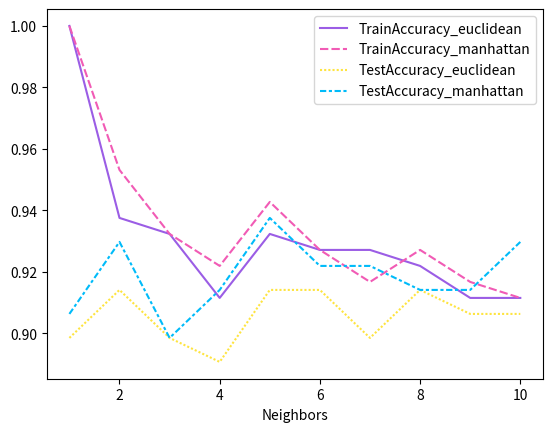

In [67]:
# 결과 확인을 위한 데이터 변환
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors", columns = "Metric",
                                                    values = ["TrainAccuracy", "TestAccuracy"])

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

- 거리 계산 방법별 정확도는 큰 차이 없어보이나 test에 대한 정확도가 manhatten방법이 좀더 높아보임

#### 결론 도출

In [68]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 2, weights = "uniform", metric = "manhattan")
knn_model.fit(df_scaled_train_x, df_train_y)
y_pred = knn_model.predict(df_scaled_test_x)
# train 데이터 셋 정확도
print("train data accuracy: {0:.3f}".format(knn_model.score(df_scaled_train_x, df_train_y)))
# test 데이터 셋 정확도
print("test data accuracy: {0:.3f}\n".format(knn_model.score(df_scaled_test_x, df_test_y)))
# confusion matrix
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

# 목표변수의 빈도 불균형 : f1 score로 모델 평가 
print(classification_report(df_test_y, y_pred, digits=3))

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

train data accuracy: 0.995
test data accuracy: 0.961

Confusion matrix: 
[[94  3]
 [ 2 29]]
              precision    recall  f1-score   support

           0      0.979     0.969     0.974        97
           1      0.906     0.935     0.921        31

    accuracy                          0.961       128
   macro avg      0.943     0.952     0.947       128
weighted avg      0.962     0.961     0.961       128



- test set에 대한 정확도 96.1%, f1-score 92.1%
- knn이 거리기반 분류 방법이기 때문에 scaled data를 이용한 후 성능이 더 높음을 사용한 것을 알 수 있다.

# 결론/ 시각화
> 결론에 비교는 모두 scale된 데이터를 이용한 최종모델을 사용하였습니다.\
test data에 대한 정확도와 암 판단 분류모델에서 중요하게 생각한 recall, 그리고 f1-score를 비교하겠습니다.

In [70]:
comparision = {'ANN' : [0.969, 0.968, 0.937], 'KNN' : [0.961, 0.935, 0.921]}
cp = pd.DataFrame(comparision)
cp.index = ['test accuracy', 'recall', 'f1-score']
cp

ANN    KNN
test accuracy  0.969  0.961
recall         0.968  0.935
f1-score       0.937  0.921

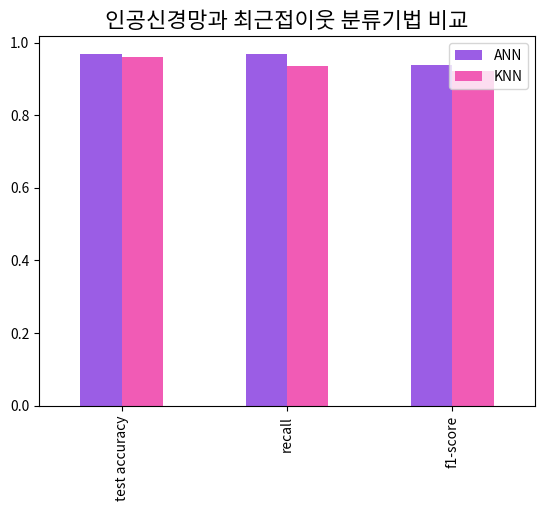

In [75]:
cp.plot.bar()
plt.title("인공신경망과 최근접이웃 분류기법 비교", fontsize = 16)
plt.show();

- 세 평가지표에서 인공신경망이 더 높은 점수를 보입니다.
- 하지만 인공신경망은 train data에 대해 1.0 정확도로 은닉층으로 인해 과적합되었지만, 암판단을 하는 모델이기 때문에 현재 데이터에 과적합되어있어도 미래 데이터가 크게 변동이 있을 것 같지 않아 저라면 인공신경망 모델을 선택해 사용할 것 같습니다.

  또 변수들을 살펴봤을 때 실제로 암을 판단하는데 실제로 큰 영향이 있을 것 같은 세포들의 수치정보로 되어있고, 그 수치정보들은 이상치가 일어나기 쉽지 않을 것이고, 마지막으로 그 수치정보가 매우 많기 때문에(모델이 판단하기에 충분한 칼럼) 과적합되어있지만 실제로 사용할 때는 큰 문제가 없을 것 같습니다.